<a href="https://colab.research.google.com/github/Tiagogavinhos/Extracting-TV-Data-Insights/blob/main/Unsupervised_Learning_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
######################################################
########## Unsupervised Learning
######################################################
########## Clustering 2D points
######################################################
########## Part I
######################################################

print("Valor de Points:",points)
print("Valor de New_Points:",new_points)

# Import KMeans from sklearn.cluster.
# Import KMeans
from sklearn.cluster import KMeans

# Using KMeans(), create a KMeans instance called model to find 3 clusters.
# To specify the number of clusters, use the n_clusters keyword argument.
# Create a KMeans instance with 3 clusters: model

model = KMeans(n_clusters=3)
model.fit(points) # Use the .fit() method of model to fit the model to the array of points points.

# Use the .predict() method of model to predict the cluster labels of new_points, assigning the result to labels.
labels = model.predict(points)

# Use the .predict() method of model to predict the cluster labels of new_points, assigning the result to labels.
labels = model.predict(new_points)



In [ ]:
######################################################
########## Unsupervised Learning
######################################################
########## Inspect your clustering
######################################################
########## Part II
######################################################

import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
# Assign column 0 of new_points to xs, and column 1 of new_points to ys.

xs = new_points[:,0]
ys = new_points[:,1]

# xs pega a primeira coluna (índice 0) → coordenadas horizontais.
# ys pega a segunda coluna (índice 1) → coordenadas verticais.

# Make a scatter plot of xs and ys, specifying the c=labels keyword arguments to color the points by their cluster label.
# Also specify alpha=0.5.

plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_


# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()
############################

In [ ]:
######################################################
########## Unsupervised Learning
######################################################
########## How many clusters of grain?
######################################################
########## Part III
######################################################

# Instructions
# For each of the given values of k, perform the following steps:
# Create a KMeans instance called model with k clusters.
# Fit the model to the grain data samples.
# Append the value of the inertia_ attribute of model to the list inertias.
# The code to plot ks vs inertias has been written for you, so hit submit to see the plot!

ks = range(1, 6) # ks = 1 / 2 / 3 / 4 / 5
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()




In [ ]:
######################################################
########## Unsupervised Learning
######################################################
########## Evaluating the grain clustering
######################################################
########## Part IV
######################################################
######################################################

########## Interesting website:
########## https://medium.com/@whyamit404/understanding-pandas-crosstab-with-simple-examples-90cf6ea5a9a1
######################################################
######################################################


# Create a KMeans model called model with 3 clusters.
# Use the .fit_predict() method of model to fit it to samples and derive the cluster labels.
# Using .fit_predict() is the same as using .fit() followed by .predict().

model = KMeans(n_clusters=3)
labels = model.fit_predict(samples) # Quick method

# Create a DataFrame with labels and varieties as columns: df
# Create a DataFrame df with two columns named 'labels' and 'varieties',
# using labels and varieties, respectively, for the column values.

df = pd.DataFrame({'labels': labels, 'varieties': varieties})
print(df)
print("O tipo do df: ",type(df))

# Create crosstab: ct
# Use the pd.crosstab() function on df['labels'] and df['varieties'] to count the number of times each grain variety coincides with each cluster label. Assign the result to ct.
# Hit submit to see the cross-tabulation!

ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)
print("O tipo do ct: ",type(ct))


In [ ]:
######################################################
########## Unsupervised Learning
######################################################
########## Scaling fish data for clustering
######################################################
########## Part V
######################################################
# https://jse.amstat.org/datasets/fishcatch.txt
# https://jse.amstat.org/jse_data_archive.htm
######################################################


# Perform the necessary imports
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
import pandas as pd

url = "https://jse.amstat.org/datasets/fishcatch.dat.txt"

# If it's a standard CSV file (comma-separated):
df = pd.read_csv(url)
# print(df.head())

# Create scaler: scaler
scaler = StandardScaler()
# https://medium.com/@mhvasconcelos/distribui%C3%A7%C3%A3o-normal-e-a-biblioteca-standard-scaler-em-python-f21c52070c6b

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)

labels = pipeline.predict(samples)

######################################################
########## Unsupervised Learning
######################################################
########## Clustering the fish data
######################################################
########## Part VI
######################################################

# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})
print(df)

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

######################################################
########## Unsupervised Learning
######################################################
########## Clustering stocks using KMeans
######################################################
########## Part VII
######################################################


# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)


######################################################
########## Unsupervised Learning
######################################################
########## Which stocks move together?
######################################################
########## Part VIII
######################################################


# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))




In [ ]:
######################################################
########## Unsupervised Learning
######################################################
########## Hierarchical clustering of the grain data
######################################################
########## Part I
######################################################


# Perform the necessary imports

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')
print(mergings)

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

######################################################
########## Unsupervised Learning
######################################################
########## Hierarchies of stocks
######################################################
########## Part II
######################################################


# Import normalize
from sklearn.preprocessing import normalize


# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram

dendrogram(mergings,
          labels=companies,
           leaf_rotation=90,
          leaf_font_size=6)

plt.show()



In [ ]:
######################################################
########## Unsupervised Learning
######################################################
########## Different linkage, different hierarchical clustering!
######################################################
########## Part I
######################################################

# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()


######################################################
########## Unsupervised Learning
######################################################
########## Extracting the cluster labels
######################################################
########## Part II
######################################################

# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

print(df)

# Create crosstab: ct
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)


######################################################
########## Unsupervised Learning
######################################################
########## t-SNE visualization of grain dataset
######################################################
########## Part III
######################################################

# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)
# O Scikit-Learn recomenda que o learning_rate seja geralmente definido como $N / 12$
# (onde $N$ é o número de amostras), mas com um mínimo de 200 para a maioria das versões.

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# URL for the UCI Seeds Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
# Column names based on the dataset description (7 features + 1 variety label)
column_names = [
    'area', 'perimeter', 'compactness', 'length_of_kernel',
    'width_of_kernel', 'asymmetry_coefficient', 'length_of_kernel_groove',
    'variety'
]

# Load the dataset, specifying delimiter and column names
# The dataset uses tab or multiple spaces as a delimiter, and has no header.
df_seeds = pd.read_csv(url, sep='\s+', names=column_names)

# 'samples' are the features (all columns except 'variety')
samples = df_seeds.drop('variety', axis=1).values

# 'varieties' are the labels (converted to string for general use)
varieties = df_seeds['variety'].astype(str).values

# 'variety_numbers' are the original numeric labels for t-SNE visualization if needed
variety_numbers = df_seeds['variety'].values

print("Seeds dataset loaded successfully.")
print("Type of samples:", type(samples))
print("Shape of samples:", samples.shape)
print("First 5 rows of samples:\n", samples[:5])
print("First 5 varieties:\n", varieties[:5])

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3844253302.py:15: SyntaxWarning: invalid escape sequence '\s'
  df_seeds = pd.read_csv(url, sep='\s+', names=column_names)


Seeds dataset loaded successfully.
Type of samples: <class 'numpy.ndarray'>
Shape of samples: (210, 7)
First 5 rows of samples:
 [[15.26   14.84    0.871   5.763   3.312   2.221   5.22  ]
 [14.88   14.57    0.8811  5.554   3.333   1.018   4.956 ]
 [14.29   14.09    0.905   5.291   3.337   2.699   4.825 ]
 [13.84   13.94    0.8955  5.324   3.379   2.259   4.805 ]
 [16.14   14.99    0.9034  5.658   3.562   1.355   5.175 ]]
First 5 varieties:
 ['1' '1' '1' '1' '1']


In [ ]:
display(df_seeds.head())

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


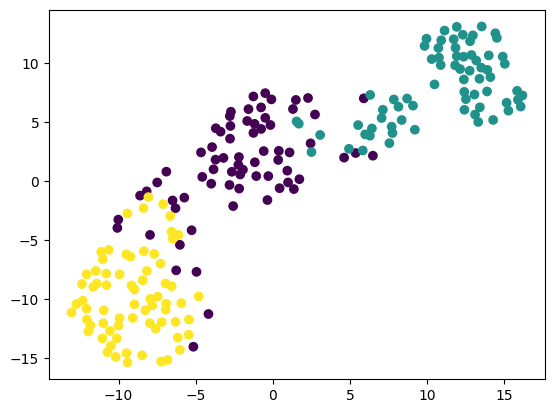

In [ ]:
######################################################
########## Unsupervised Learning
######################################################
########## t-SNE visualization of grain dataset
######################################################
########## Part III
######################################################

# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()


In [ ]:
######################################################
########## Unsupervised Learning
######################################################
########## A t-SNE map of the stock market
######################################################
########## Part III
######################################################

# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)
model_200 = TSNE(learning_rate=200)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)
tsne_features_200 = model_200.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()


In [ ]:
######################################################
########## Unsupervised Learning
######################################################
########## Correlated data in nature
######################################################
########## Part IV
######################################################

# You are given an array grains giving the width and length of samples of grain. You suspect that width and length will be correlated.
# To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


# Assign the 0th column of grains: width
width = samples[:,0] # Changed 'grains' to 'samples'
print("Valore s de width:",width) # Fixed typo 'wi' to 'width'

# Assign the 1st column of grains: length
length = samples[:,1] # Changed 'grains' to 'samples'
print("Valore s de length:",length)


# Scatter plot width vs length
plt.scatter(width,length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)


In [ ]:
######################################################
########## Unsupervised Learning
######################################################
########## Decorrelating the grain measurements with PCA
######################################################
########## Part V
######################################################


# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print("Correlation value:",correlation)


######################################################
########## Unsupervised Learning
######################################################
########## Extra exercise
######################################################
########## Part VI
######################################################
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model_TSNE = TSNE(learning_rate=200)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model_TSNE.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs_TSNE = tsne_features[:,0]

# Select the 1th feature: ys
ys_TSNE = tsne_features[:,1]

# Scatter plot
plt.scatter(xs_TSNE, ys_TSNE, alpha=0.5)
plt.show()


Value mean model: [14.84752381 14.55928571  0.87099857  5.62853333  3.25860476  3.70020095
  5.40807143]
Valor do first_pc: [ 0.8842285   0.39540542  0.00431132  0.12854448  0.11105914 -0.12761562
  0.1289665 ]


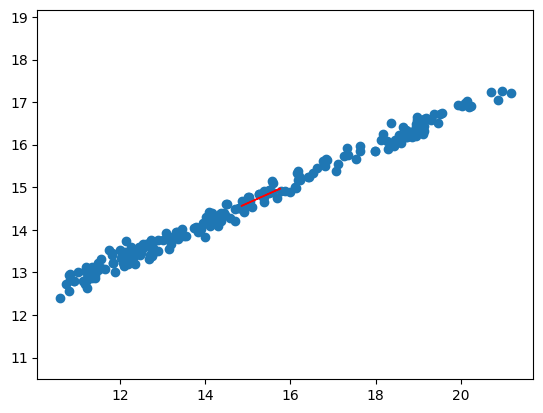

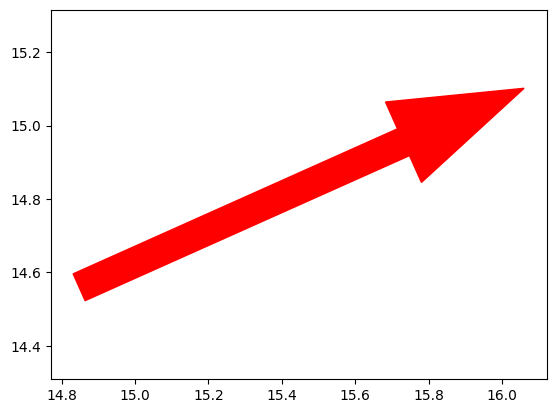

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# --- Start of code copied from cell 533aa81b to define 'samples' (for reproducibility) ---
# URL for the UCI Seeds Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
# Column names based on the dataset description (7 features + 1 variety label)
column_names = [
    'area', 'perimeter', 'compactness', 'length_of_kernel',
    'width_of_kernel', 'asymmetry_coefficient', 'length_of_kernel_groove',
    'variety'
]

# Load the dataset, specifying delimiter and column names
# The dataset uses tab or multiple spaces as a delimiter, and has no header.
df_seeds = pd.read_csv(url, sep=r'\s+', names=column_names)

# 'samples' are the features (all columns except 'variety')
grains = df_seeds.drop('variety', axis=1).values
# --- End of copied code ---

######################################################
########## Unsupervised Learning
######################################################
########## The first principal component
######################################################
########## Part VII
######################################################


# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit_transform(grains)

# Get the mean of the grain samples: mean
mean = model.mean_
print("Value mean model:",mean)

# Get the first principal component: first_pc
first_pc = model.components_[0,:]
print("Valor do first_pc:",first_pc)

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.08)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [ ]:
######################################################
########## Unsupervised Learning
######################################################
########## Variance of the PCA features
######################################################
########## Part VIII
######################################################


# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [ ]:
#######################################################
########## Unsupervised Learning
#######################################################
########## Dimension reduction of the fish measurements
#######################################################
########## Part IX
#######################################################

# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)


In [ ]:
#######################################################
########## Unsupervised Learning
#######################################################
########## A tf-idf word-frequency array
#######################################################
########## Part X
#######################################################

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()
print("\n")
print("Type of tfidf:",type(tfidf))
print(tfidf)
print("\n")

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)
print("Type of csr_matrix:", type(csr_matrix))
print("\n")

# Print result of toarray() method
print("Result of csr_matrix:", csr_mat.toarray())
print(csr_mat.toarray())

# Get the words: words
# The columns of the array correspond to words. Get the list of words by calling the
# .get_feature_names_out() method of tfidf, and assign the result to words.
words = tfidf.get_feature_names_out()

# Print words
print(words)

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

# Example of creating a sparse matrix
# (data, indices, indptr) format for a 2x3 matrix
data = [1, 2, 3]
indices = [0, 1, 2]
indptr = [0, 1, 3, 3]
sparse_matrix = csr_matrix((data, indices, indptr), shape=(3, 3))
type(print(sparse_matrix))

# Convert the sparse matrix to a dense NumPy array
dense_array = sparse_matrix.toarray()

print(dense_array)
# Output:
# [[1 0 0]
#  [0 2 3]
#  [0 0 0]]


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	1
  (1, 1)	2
  (1, 2)	3
[[1 0 0]
 [0 2 3]
 [0 0 0]]


In [ ]:
#######################################################
########## Unsupervised Learning
#######################################################
########## Clustering Wikipedia part I
#######################################################
########## Part XI
#######################################################

# Perform the necessary imports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline



# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)
svd_extra = TruncatedSVD()
# https://www.geeksforgeeks.org/machine-learning/understanding-tf-idf-term-frequency-inverse-document-frequency/

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline

pipeline = make_pipeline(svd, kmeans)
pipeline_extra = make_pipeline(svd_extra, kmeans)

#######################################################
########## Unsupervised Learning
#######################################################
########## Clustering Wikipedia part II
#######################################################
########## Part X
#######################################################

# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))



In [ ]:
#######################################################
########## Unsupervised Learning
#######################################################
########## NMF applied to Wikipedia articles
#######################################################
########## Part XI
#######################################################

# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))

#######################################################
########## Unsupervised Learning
#######################################################
########## NMF features of the Wikipedia articles
#######################################################
########## Part XII
#######################################################

# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)
df_index = pd.DataFrame(nmf_features)

# Print df
print("Printing df:",df)
print("Printing df_index:",df_index)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])
print("\n")
print(df_index.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])
print("\n")
print(df_index.loc['Denzel Washington'])


#######################################################
########## Unsupervised Learning
#######################################################
########## NMF learns topics of documents
#######################################################
########## Part XIII
#######################################################

# Import pandas
import pandas as pd

# Create a DataFrame: components_df
# Create a DataFrame components_df from model.components_, setting columns=words so that columns are labeled by the words.
# print("Plot components_:",model.components_)
# print("Type components_",type(model.components_))
# print("\n")

components_df = pd.DataFrame(model.components_, columns=words)
print(components_df)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]
print("Component:",component)

# Print result of nlargest
print(component.nlargest())


#######################################################
########## Unsupervised Learning
#######################################################
########## Explore the LED digits dataset
#######################################################
########## Part XIV
#######################################################

# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print("Value of digit:",digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print("Value of bitmap:",bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()





In [ ]:
#######################################################
########## Unsupervised Learning
#######################################################
########## NMF learns the parts of images
#######################################################
########## Part XIV
#######################################################

# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Select the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

#######################################################
########## Unsupervised Learning
#######################################################
########## PCA doesn't learn parts
#######################################################
########## Part XV
#######################################################

# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)